### Importamos el grafo el grafo

In [1]:
import networkx as nx
grafo_metro = nx.read_gexf('grafo.gexf')

## Análisis de métricas

#### Centralidad de intermediación

In [2]:
bet_centr = nx.betweenness_centrality(grafo_metro, k=20, normalized=True)
top10_bet = sorted(bet_centr.items(), key=lambda x: x[1], reverse=True)[:10]
print("Top 10 (betweenness centrality):", top10_bet)

Top 10 (betweenness centrality): [('PRINCIPE PIO', 0.3724432877231114), ('CASA DE CAMPO', 0.33091603273397885), ('GREGORIO MARAÑON', 0.3176496554534677), ('COLONIA JARDIN', 0.31693464730290455), ('PUERTA DEL SUR', 0.3157840594744122), ('AVIACION ESPAÑOLA', 0.3148426694329184), ('ALONSO MARTINEZ', 0.3140133496344597), ('CUATRO VIENTOS', 0.3127506915629322), ('JOAQUIN VILUMBRALES', 0.31065871369294606), ('BATAN', 0.3071720839096358)]


Esto nos indica que si vas de una parada cualquiera a otra cualquiera, la probabilidad de pasar por Príncipe Pío es de un 37.24%. 

Así mismo, en esta lista están las 10 paradas con mayor probabilidad de que pases por ellas tomando de origen y destino cualquier pareja de paradas

#### Centralidad de cercanía

In [3]:
closeness_dict = nx.closeness_centrality(grafo_metro.to_undirected())
top10_closeness = sorted(closeness_dict.items(), key=lambda x: x[1], reverse=True)[:10]
print("Top 10 (closeness centrality, sin dirección):", top10_closeness)

Top 10 (closeness centrality, sin dirección): [('GREGORIO MARAÑON', 0.1110087517273146), ('ALONSO MARTINEZ', 0.11090658076392085), ('TRIBUNAL', 0.10831460674157303), ('AVENIDA DE AMERICA', 0.10802330793366204), ('NUÑEZ DE BALBOA', 0.10635481023830538), ('RUBEN DARIO', 0.105562855891371), ('BILBAO', 0.1052861511577108), ('NUEVOS MINISTERIOS', 0.10524017467248908), ('PLAZA DE ESPAÑA', 0.10501089324618737), ('DIEGO DE LEON', 0.10401381096245145)]


#### Centralidad de autovector

In [4]:
# Eigenvector Centrality
ev_centrality = nx.eigenvector_centrality(grafo_metro.to_undirected(), max_iter=1000)
top10_ev = sorted(ev_centrality.items(), key=lambda x: x[1], reverse=True)[:10]
print("Top 10 (Eigenvector Centrality):", top10_ev)

# PageRank
pagerank_dict = nx.pagerank(grafo_metro, alpha=0.85)
top10_pr = sorted(pagerank_dict.items(), key=lambda x: x[1], reverse=True)[:10]
print("Top 10 (PageRank):", top10_pr)

Top 10 (Eigenvector Centrality): [('SOL', 0.2958268151352471), ('CALLAO', 0.28867993540407444), ('ALONSO MARTINEZ', 0.27531854126388683), ('GRAN VIA', 0.2728336039682848), ('TRIBUNAL', 0.2663567719494338), ('OPERA', 0.25780696822666166), ('AVENIDA DE AMERICA', 0.2349363632195224), ('PLAZA DE ESPAÑA', 0.2320074164519681), ('PRINCIPE PIO', 0.1990944046962476), ('BILBAO', 0.1964460006183012)]
Top 10 (PageRank): [('AVENIDA DE AMERICA', 0.00926810652463553), ('SOL', 0.00807972492722613), ('PLAZA DE CASTILLA', 0.008014180688882303), ('ALONSO MARTINEZ', 0.007580204792482841), ('CUATRO CAMINOS', 0.006994415130477095), ('OPORTO', 0.006877388240671521), ('PRINCIPE PIO', 0.006858128408605104), ('MAR DE CRISTAL', 0.006840761802046134), ('PUEBLO NUEVO', 0.0067879835986301915), ('LEGAZPI', 0.0067816343046739665)]


## Análisis de comunidades

Louvain

In [5]:
from networkx.algorithms import community

# Aplicamos Louvain, asumiendo un grafo sin pesos
communities_louvain = community.louvain_communities(grafo_metro, weight=None, resolution=1.0, seed=None)
print(f"Número de comunidades detectadas: {len(communities_louvain)}")
print(f"Comunidades (primeras 3): {list(communities_louvain)[:3]}")


Número de comunidades detectadas: 14
Comunidades (primeras 3): [{'LAS MUSAS', 'COSLADA CENTRAL', 'SAN FERNANDO', 'ESTADIO METROPOLITANO', 'GARCIA NOBLEJAS', 'HOSPITAL DEL HENARES', 'LA RAMBLA', 'SAN BLAS', 'HENARES', 'JARAMA', 'SIMANCAS', 'BARRIO DEL PUERTO'}, {'AVIACION ESPAÑOLA', 'MOSTOLES CENTRAL', 'EMPALME', 'PARQUE LISBOA', 'CUATRO VIENTOS', 'ALCORCON CENTRAL', 'BATAN', 'PARQUE OESTE', 'CASA DE CAMPO', 'COLONIA JARDIN', 'PUERTA DEL SUR', 'CAMPAMENTO', 'UNIVERSIDAD REY JUAN CARLOS', 'JOAQUIN VILUMBRALES'}, {'MENDEZ ALVARO', 'ARGANZUELA-PLANETARIO', 'PORTAZGO', 'LA GAVIA', 'ATOCHA', 'VILLA DE VALLECAS', 'ALTO DEL ARENAL', 'TIRSO DE MOLINA', 'BUENOS AIRES', 'CONDE DE CASAL', 'MENENDEZ PELAYO', 'ANTON MARTIN', 'PUENTE DE VALLECAS', 'CONGOSTO', 'NUEVA NUMANCIA', 'VALDECARROS', 'MIGUEL HERNANDEZ', 'PACIFICO', 'ESTACION DEL ARTE', 'LAS SUERTES', 'SIERRA DE GUADALUPE'}]


Girvan-Newman

In [6]:
# Lento
gn_generator = community.girvan_newman(grafo_metro)
first_partition = next(gn_generator)
print("Partición con 2 comunidades:", [list(c) for c in first_partition])
second_partition = next(gn_generator)
print("Partición con 3 comunidades:", [list(c) for c in second_partition])

Partición con 2 comunidades: [['COLON', 'PUEBLO NUEVO', 'PAN BENDITO', 'LAGUNA', 'PROSPERIDAD', 'FUENCARRAL', 'MONTECARMELO', 'ALTO DEL ARENAL', 'ESTRECHO', 'TIRSO DE MOLINA', 'SAN FERMIN-ORCASUR', 'VALDEACEDERAS', 'CARABANCHEL ALTO', 'VALDECARROS', 'VICALVARO', 'PRINCIPE PIO', 'BAMBU', 'SANTO DOMINGO', 'LA ALMUDENA', 'MENDEZ ALVARO', 'ARGANZUELA-PLANETARIO', 'SAINZ DE BARANDA', 'GOYA', 'AVENIDA DE AMERICA', 'HENARES', 'ESPERANZA', 'CARTAGENA', 'OPORTO', 'ANTON MARTIN', 'VENTAS', 'PINAR DE CHAMARTIN', 'PALOS DE LA FRONTERA', 'BARRIO DE LA CONCEPCION', 'VILLAVERDE ALTO', 'MIGUEL HERNANDEZ', 'AEROPUERTO T-4', 'AVENIDA DE LA PAZ', 'ALSACIA', 'CANILLEJAS', 'PINAR DEL REY', 'SIERRA DE GUADALUPE', 'FERIA DE MADRID', 'PARQUE DE LAS AVENIDAS', 'ASCAO', 'HOSPITAL 12 DE OCTUBRE', 'TRES OLIVOS', 'NUEVOS MINISTERIOS', 'CIUDAD DE LOS ANGELES', 'GREGORIO MARAÑON', 'RIVAS URBANIZACIONES', 'ATOCHA', 'ABRANTES', 'OPERA', 'DIEGO DE LEON', "O'DONNELL", 'BUENOS AIRES', 'MONCLOA', 'CANILLAS', 'BANCO DE ESP

In [7]:
# Para optimizar el cálculo, se puede trabajar con subsets:
nodes_subset = list(grafo_metro.nodes())[:500]
G_subset = grafo_metro.subgraph(nodes_subset).copy()
gn_generator = community.girvan_newman(G_subset)
first_partition = next(gn_generator)
print("Partition with 2 communities:", [list(c) for c in first_partition])
second_partition = next(gn_generator)
print("Partition with 3 communities:", [list(c) for c in second_partition])

Partition with 2 communities: [['COLON', 'PUEBLO NUEVO', 'PAN BENDITO', 'LAGUNA', 'PROSPERIDAD', 'FUENCARRAL', 'MONTECARMELO', 'ALTO DEL ARENAL', 'ESTRECHO', 'TIRSO DE MOLINA', 'SAN FERMIN-ORCASUR', 'VALDEACEDERAS', 'CARABANCHEL ALTO', 'VALDECARROS', 'VICALVARO', 'PRINCIPE PIO', 'BAMBU', 'SANTO DOMINGO', 'LA ALMUDENA', 'MENDEZ ALVARO', 'ARGANZUELA-PLANETARIO', 'SAINZ DE BARANDA', 'GOYA', 'AVENIDA DE AMERICA', 'HENARES', 'ESPERANZA', 'CARTAGENA', 'OPORTO', 'ANTON MARTIN', 'VENTAS', 'PINAR DE CHAMARTIN', 'PALOS DE LA FRONTERA', 'BARRIO DE LA CONCEPCION', 'VILLAVERDE ALTO', 'MIGUEL HERNANDEZ', 'AEROPUERTO T-4', 'AVENIDA DE LA PAZ', 'ALSACIA', 'CANILLEJAS', 'PINAR DEL REY', 'SIERRA DE GUADALUPE', 'FERIA DE MADRID', 'PARQUE DE LAS AVENIDAS', 'ASCAO', 'HOSPITAL 12 DE OCTUBRE', 'TRES OLIVOS', 'NUEVOS MINISTERIOS', 'CIUDAD DE LOS ANGELES', 'GREGORIO MARAÑON', 'RIVAS URBANIZACIONES', 'ATOCHA', 'ABRANTES', 'OPERA', 'DIEGO DE LEON', "O'DONNELL", 'BUENOS AIRES', 'MONCLOA', 'CANILLAS', 'BANCO DE ES

In [8]:
# Evaluar la partición con community.modularity:
best_modularity = -1
best_partition = None
for idx, partition_gn in enumerate(community.girvan_newman(G_subset)):
    partition_list = list(partition_gn)
    mod_gn = community.modularity(G_subset, partition_list)
    print(f"Iteración {idx+1} -> {len(partition_list)} comunidades, modularidad = {mod_gn:.4f}")
    if mod_gn > best_modularity:
        best_modularity = mod_gn
        best_partition = partition_list
    else:
        break
print(f"Mejor modularidad con {len(best_partition)} comunidades: {best_modularity:.4f}")

Iteración 1 -> 2 comunidades, modularidad = 0.2508
Iteración 2 -> 3 comunidades, modularidad = 0.4875
Iteración 3 -> 4 comunidades, modularidad = 0.6697
Iteración 4 -> 5 comunidades, modularidad = 0.6956
Iteración 5 -> 6 comunidades, modularidad = 0.7178
Iteración 6 -> 7 comunidades, modularidad = 0.7616
Iteración 7 -> 8 comunidades, modularidad = 0.7727
Iteración 8 -> 9 comunidades, modularidad = 0.7792
Iteración 9 -> 10 comunidades, modularidad = 0.7871
Iteración 10 -> 11 comunidades, modularidad = 0.7941
Iteración 11 -> 12 comunidades, modularidad = 0.7979
Iteración 12 -> 13 comunidades, modularidad = 0.7996
Iteración 13 -> 14 comunidades, modularidad = 0.8078
Iteración 14 -> 15 comunidades, modularidad = 0.8083
Iteración 15 -> 16 comunidades, modularidad = 0.8080
Mejor modularidad con 15 comunidades: 0.8083


## Representación

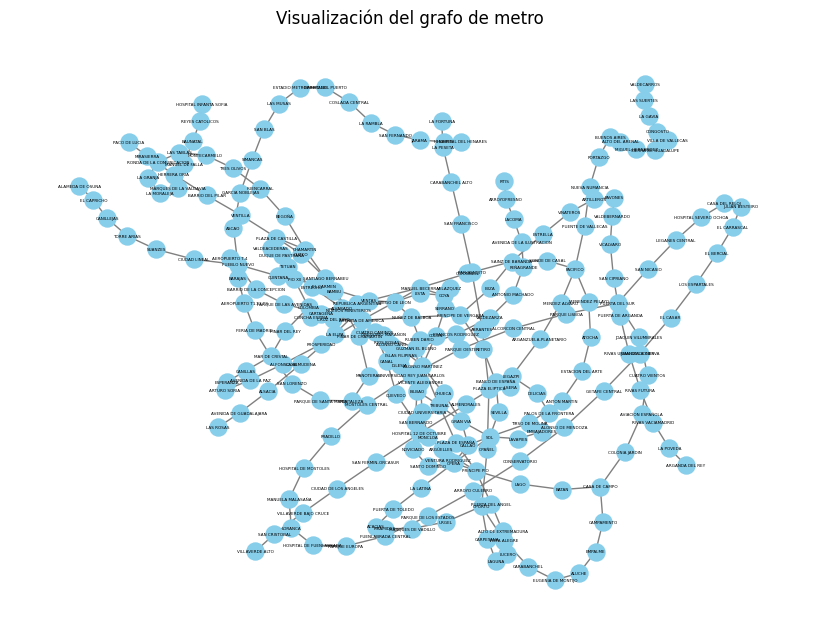

In [9]:
import networkx as nx
import matplotlib.pyplot as plt

# Cargar el archivo GEXF
G = nx.read_gexf("grafo.gexf")

# Dibujar el grafo
plt.figure(figsize=(8, 6))
nx.draw(G, with_labels=True, node_color='skyblue', node_size=150, edge_color='gray', font_size=3)
plt.title("Visualización del grafo de metro")
plt.show()

Comunidades detectadas de Louvian

C:\Users\diego\AppData\Local\Temp\ipykernel_10648\2732084113.py:10: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap('tab20', num_comunidades)


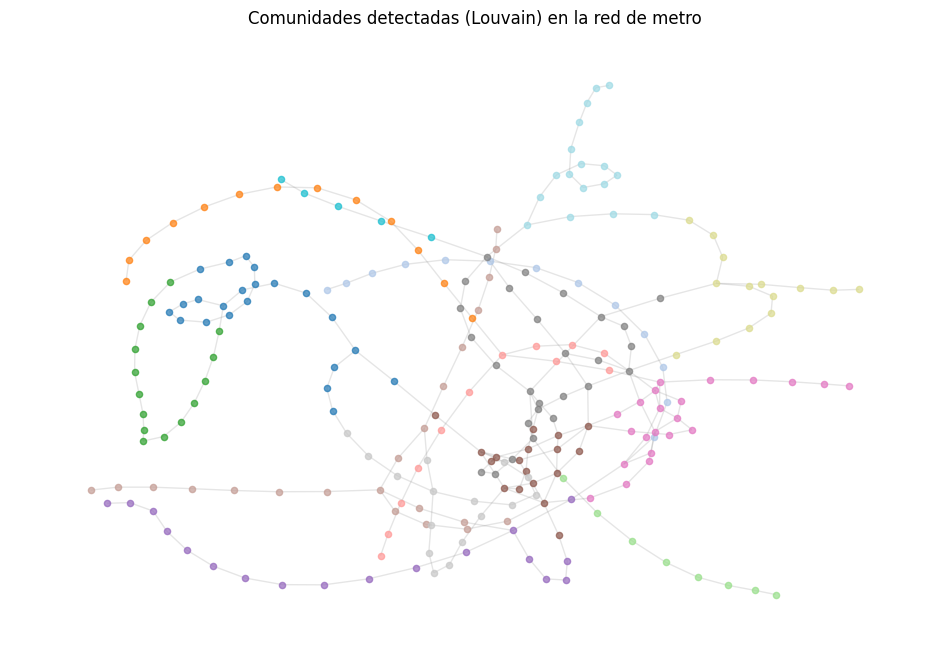

In [10]:
# Detectar comunidades con Louvain
communities_louvain = community.louvain_communities(G_subset)
# Número de comunidades detectadas
num_comunidades = len(communities_louvain)
# Posiciones de los nodos en el layout
pos = nx.spring_layout(G_subset, seed=42)
# Crear figura
plt.figure(figsize=(12,8))
# Colormap para las comunidades
cmap = plt.cm.get_cmap('tab20', num_comunidades)
# Dibujar nodos por comunidad
for idx, comm_set in enumerate(communities_louvain):
    nx.draw_networkx_nodes(
        G_subset,
        pos,
        nodelist=list(comm_set),
        node_color=[cmap(idx)],
        node_size=20,
        alpha=0.7
    )
nx.draw_networkx_edges(G_subset, pos, alpha=0.2, edge_color='gray')
plt.axis('off')
plt.title("Comunidades detectadas (Louvain) en la red de metro")
plt.show()

Comunidades detectadas de Girvan-Newman

C:\Users\diego\AppData\Local\Temp\ipykernel_10648\2424735385.py:8: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap('tab20', num_comunidades)


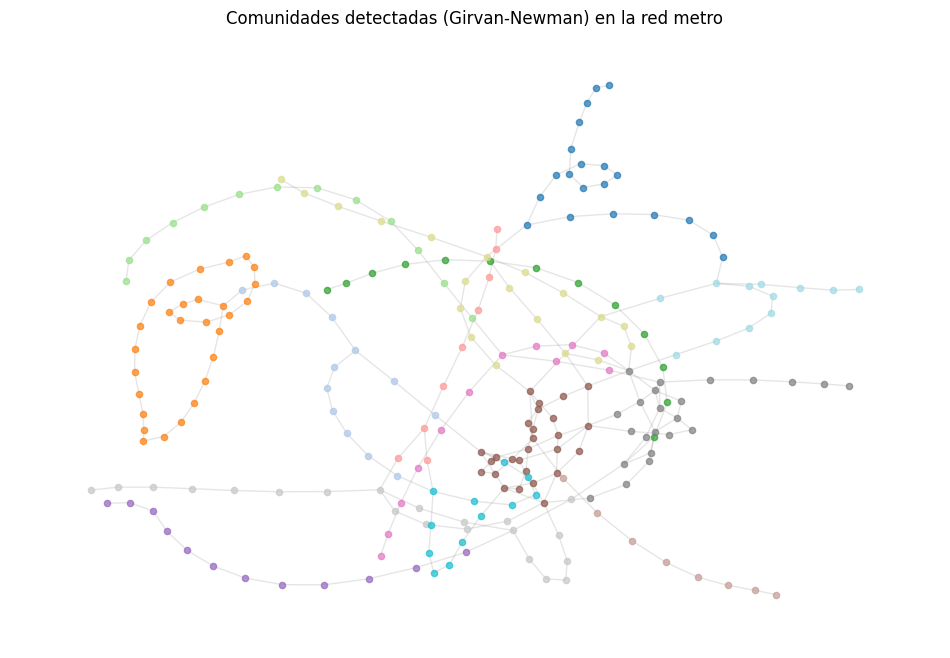

In [11]:
# Número de comunidades detectadas
num_comunidades = len(best_partition)
# Posiciones de los nodos en el layout
pos = nx.spring_layout(G_subset, seed=42)
# Crear figura
plt.figure(figsize=(12,8))
# Colormap para las comunidades
cmap = plt.cm.get_cmap('tab20', num_comunidades)
# Dibujar nodos por comunidad
for idx, comm_set in enumerate(best_partition):
    nx.draw_networkx_nodes(
        G_subset,
        pos,
        nodelist=list(comm_set),
        node_color=[cmap(idx)],
        node_size=20,
        alpha=0.7
    )
nx.draw_networkx_edges(G_subset, pos, alpha=0.2, edge_color='gray')
plt.axis('off')
plt.title("Comunidades detectadas (Girvan-Newman) en la red metro")
plt.show()